# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [3]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | yazoo city
Processing Record 3 of Set 1 | kiunga
Processing Record 4 of Set 1 | melfi
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | general fernandez oro
Processing Record 9 of Set 1 | fort st. john
Processing Record 10 of Set 1 | fort bragg
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | mili
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | altar
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | usogorsk
Processing Record 22 of Set 1 | nabire
Processing Record 23 of Set 1 | puerto ayor

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#relevant fields from the dataframe
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Windspeed     573
Country       573
Date          573
dtype: int64

In [24]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,grytviken,-54.2811,-36.5092,45.45,96,95,14.56,GS,1704579924
1,yazoo city,32.8551,-90.4056,41.92,73,100,9.01,US,1704579939
2,kiunga,-6.1219,141.2906,73.99,100,100,3.29,PG,1704579939
3,melfi,40.9965,15.6514,47.50,87,100,1.77,IT,1704579940
4,tiksi,71.6872,128.8694,-29.47,98,39,7.63,RU,1704579940


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,45.45,96,95,14.56,GS,1704579924
1,yazoo city,32.8551,-90.4056,41.92,73,100,9.01,US,1704579939
2,kiunga,-6.1219,141.2906,73.99,100,100,3.29,PG,1704579939
3,melfi,40.9965,15.6514,47.50,87,100,1.77,IT,1704579940
4,tiksi,71.6872,128.8694,-29.47,98,39,7.63,RU,1704579940


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

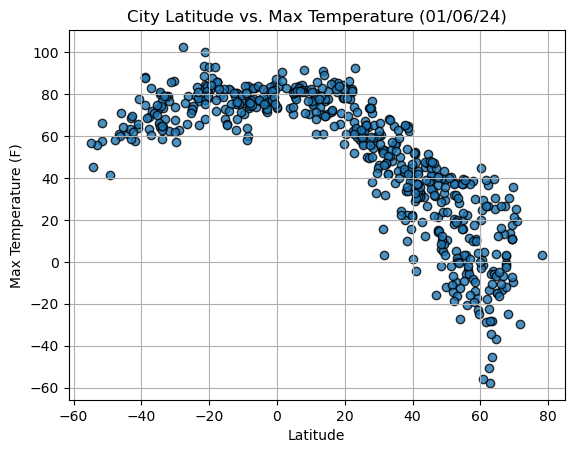

In [27]:
# Build scatter plot for latitude vs. temperature

plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

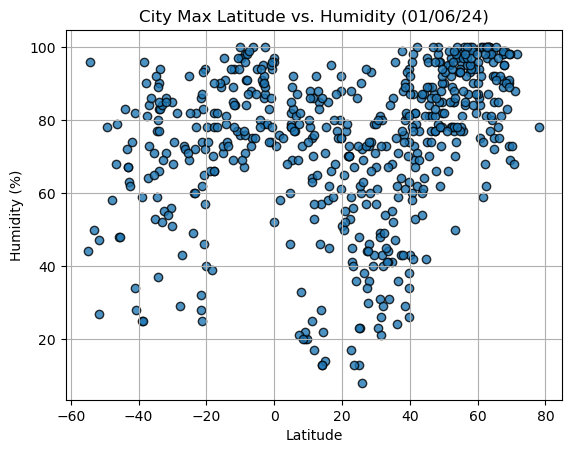

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

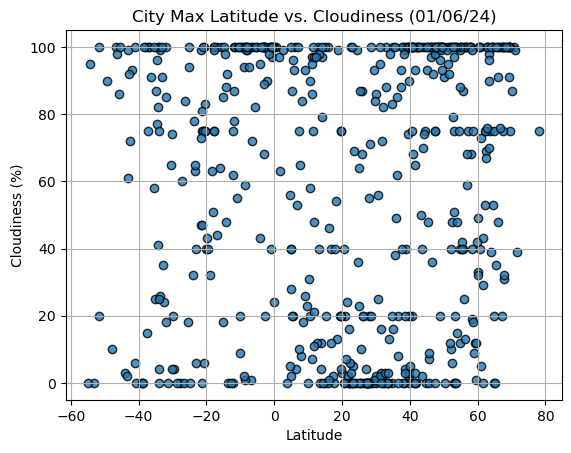

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

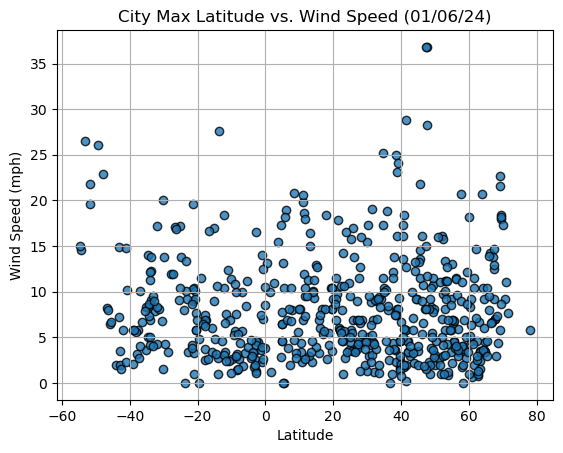

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
1,yazoo city,32.8551,-90.4056,41.92,73,100,9.01,US,1704579939
3,melfi,40.9965,15.6514,47.50,87,100,1.77,IT,1704579940
4,tiksi,71.6872,128.8694,-29.47,98,39,7.63,RU,1704579940
6,whitehorse,60.7161,-135.0538,-1.43,84,40,4.61,CA,1704579941
8,fort st. john,56.2499,-120.8529,-4.11,84,100,11.50,CA,1704579941


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,45.45,96,95,14.56,GS,1704579924
2,kiunga,-6.1219,141.2906,73.99,100,100,3.29,PG,1704579939
5,adamstown,-25.0660,-130.1015,72.63,69,94,17.18,PN,1704579940
7,general fernandez oro,-38.9530,-67.9249,87.94,25,0,5.75,AR,1704579941
13,puerto natales,-51.7236,-72.4875,57.65,47,100,21.85,CL,1704579932


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8615605450062314


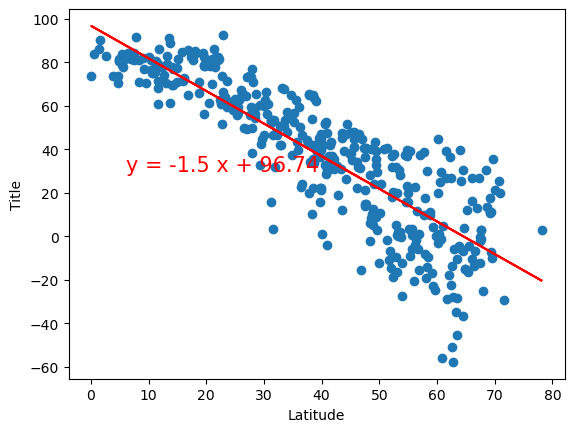

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6,30))

The r-squared is: 0.48277899242292965


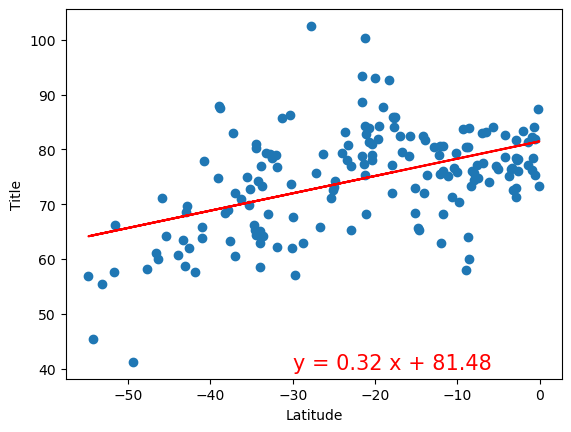

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** There's a very strong negative relationship bewteen temperature and latitude in the northern hemisphere. There's a moderate slightly positive relationship between temperature and latitude in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.48553870293611207


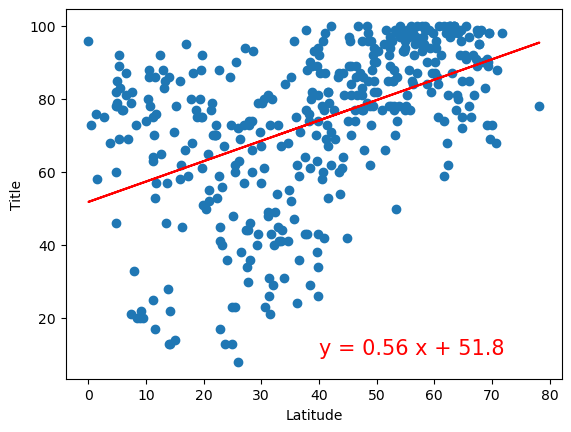

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.45189289102924785


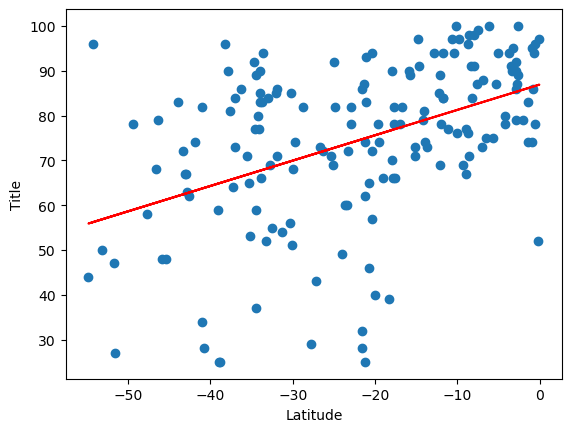

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** There's a moderate positive relationship bewteen humidity and latitude in the northern hemisphere. There's a moderate positive relationship between temperature and latitude in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.28734605559453547


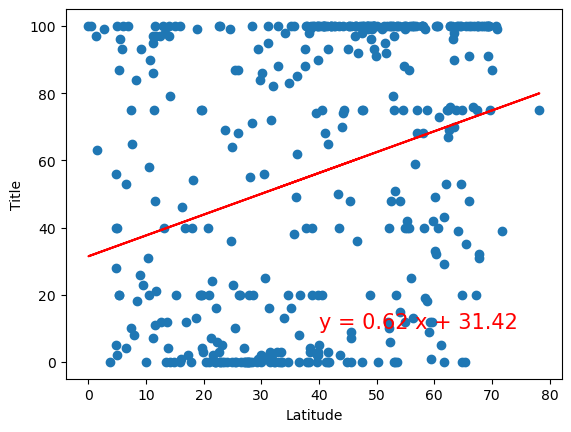

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.25864804282922044


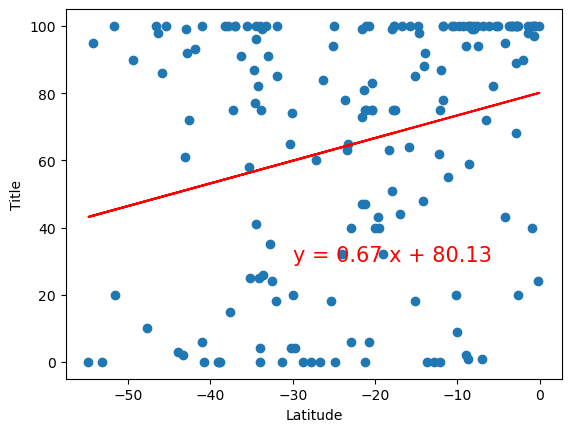

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** 
There's a weak positive relationship bewteen cloudiness and latitude in the northern hemisphere. There's a weak positive relationship between cloudiness and latitude in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.02605536607614968


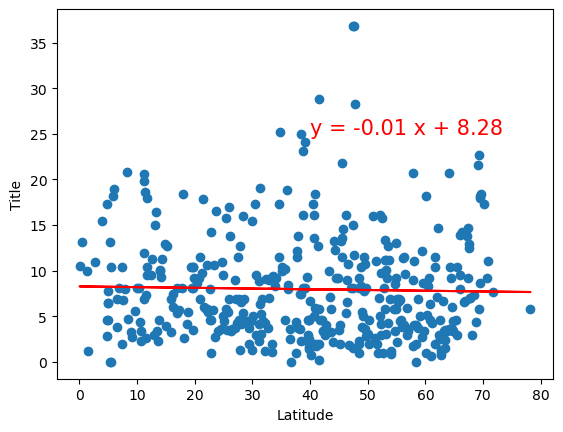

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.3353713228379676


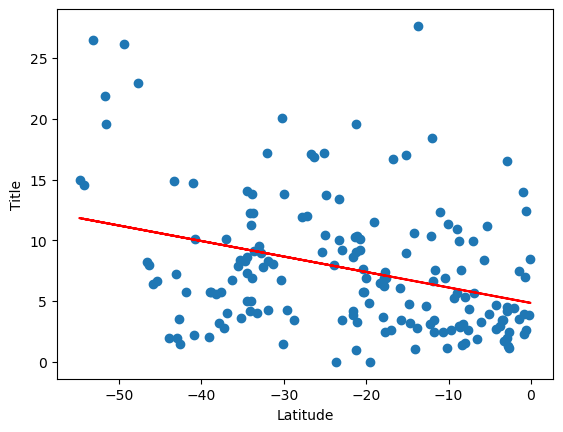

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** 
There's a very weak negative relationship bewteen windspeed and latitude in the northern hemisphere. There's a weak negative relationship between windspeed and latitude in the southern hemisphere.